In [5]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)


# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

Let's continue with our NYC 311 service requests example.

In [6]:
complaints = pd.read_csv('../data/service-requests.zip', compression='zip', low_memory=False)

### Selecting only noise complaints


Which borough has the most noise complaints? 

First, we'll take a look at the data to see what it looks like:

In [7]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,33526864,06/06/2016 05:01:00 PM,06/08/2016 03:41:00 PM,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,NaN,NaN,NaN,NaN,NaN,GRAND CONCOURSE,206 ST E,INTERSECTION,NaN,NaN,NaN,Closed,NaN,Service Request status for this request is ava...,06/08/2016 03:41:00 PM,Unspecified BRONX,BRONX,NaN,NaN,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33527101,06/06/2016 01:18:00 PM,06/07/2016 01:18:00 PM,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,10037,1960 PARK AVENUE,PARK AVENUE,HARLEM RIVER DRIVE SB EN PRK,HARLEM RIVER DRIVE EXIT 20,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection inv...,06/07/2016 01:18:00 PM,11 MANHATTAN,MANHATTAN,1002035.0,234251.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.8096,-73.9358,"(40.80962280597619, -73.93575360303117)"
2,33527148,06/07/2016 12:29:18 AM,06/07/2016 01:46:13 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10030,101 WEST 141 STREET,WEST 141 STREET,LENOX AVENUE,7 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,06/07/2016 08:29:18 AM,The Police Department responded to the complai...,06/07/2016 01:46:13 AM,10 MANHATTAN,MANHATTAN,1001328.0,237302.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.8180,-73.9383,"(40.817998342152926, -73.93829980045645)"
3,33527176,06/06/2016 10:12:00 PM,NaN,DEP,Department of Environmental Protection,Air Quality,"Air: Dust, Construction/Demolition (AE4)",NaN,NaN,NaN,NaN,NaN,NaN,26 ST,ROBERT F KENNEDY BRIDGE,INTERSECTION,NaN,NaN,NaN,Open,NaN,NaN,NaN,Unspecified QUEENS,QUEENS,NaN,NaN,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33527223,06/07/2016 12:39:55 AM,06/08/2016 12:45:08 AM,HPD,Department of Housing Preservation and Develop...,HPD Literature Request,The ABCs of Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,06/08/2016 12:39:55 AM,The literature will be emailed within 24 hours...,06/07/2016 12:44:24 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To get the noise complaints, we need to find the rows where the "Complaint Type" column is "Noise - Street/Sidewalk". I'll show you how to do that, and then explain what's going on.

In [8]:
# complaints['Complaint Type'] == "Noise - Street/Sidewalk"]
noise_complaints = complaints[complaints['Complaint Type'] == "Noise - Street/Sidewalk"]
noise_complaints[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
2,33527148,06/07/2016 12:29:18 AM,06/07/2016 01:46:13 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10030,101 WEST 141 STREET,WEST 141 STREET,LENOX AVENUE,7 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,06/07/2016 08:29:18 AM,The Police Department responded to the complai...,06/07/2016 01:46:13 AM,10 MANHATTAN,MANHATTAN,1001328.0,237302.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.8180,-73.9383,"(40.817998342152926, -73.93829980045645)"
200,33486616,06/02/2016 01:38:45 AM,06/02/2016 03:10:38 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,55 PAYSON AVENUE,PAYSON AVENUE,DYCKMAN STREET,BEAK STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,06/02/2016 09:38:45 AM,The Police Department responded and upon arriv...,06/02/2016 03:10:38 AM,12 MANHATTAN,MANHATTAN,1004165.0,255246.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.8672,-73.9280,"(40.867243417383946, -73.92799687001796)"
202,33486686,06/01/2016 09:57:07 PM,06/02/2016 01:54:36 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10282,22 RIVER TERRACE,RIVER TERRACE,PARK PLACE WEST,WARREN STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,06/02/2016 05:57:07 AM,The Police Department responded to the complai...,06/02/2016 01:54:36 AM,01 MANHATTAN,MANHATTAN,979805.0,200636.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7174,-74.0160,"(40.717375088539015, -74.01603485832543)"


If you look at `noise_complaints`, you'll see that this worked, and it only contains complaints with the right complaint type. But how does this work? Let's deconstruct it into two pieces

In [9]:
complaints['Complaint Type'] == "Noise - Street/Sidewalk"

0         False
1         False
2          True
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
          ...  
205674    False
205675    False
205676    False
205677    False
205678    False
205679    False
205680    False
205681    False
205682    False
205683    False
205684    False
205685    False
205686    False
205687    False
205688    False
205689    False
205690    False
205691    False
205692    False
205693    False
205694    False
205695    False
205696    False
205697    False
205698    False
Name: Complaint Type, dtype: bool

This is a big array of `True`s and `False`s, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where our boolean array evaluated to `True`.  It's important to note that for row filtering by a boolean array the length of our dataframe's index must be the same length as the boolean array used for filtering.

You can also combine more than one condition with the `&` operator like this:

In [10]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[is_noise & in_brooklyn][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
210,33486750,06/02/2016 02:03:03 AM,06/02/2016 06:45:18 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11222,1128 MANHATTAN AVENUE,MANHATTAN AVENUE,CLAY STREET,BOX STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,06/02/2016 10:03:03 AM,The Police Department responded and upon arriv...,06/02/2016 06:45:18 AM,01 BROOKLYN,BROOKLYN,996621.0,207773.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7370,-73.9554,"(40.73695687996981, -73.95535983414663)"
446,33492093,06/02/2016 12:39:37 AM,06/02/2016 06:46:02 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11249,1 NORTH 3 STREET,NORTH 3 STREET,BODY OF WATER,RIVER STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,06/02/2016 08:39:37 AM,The Police Department responded and upon arriv...,06/02/2016 06:46:02 AM,01 BROOKLYN,BROOKLYN,993803.0,201171.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7188,-73.9655,"(40.71883949387697, -73.96553782443846)"
465,33492470,06/01/2016 11:49:05 PM,06/02/2016 12:34:27 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11238,NaN,NaN,NaN,NaN,ST MARKS AVENUE,GRAND AVENUE,INTERSECTION,BROOKLYN,NaN,Precinct,Closed,06/02/2016 07:49:05 AM,The Police Department responded to the complai...,06/02/2016 12:34:27 AM,08 BROOKLYN,BROOKLYN,994639.0,186032.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6773,-73.9625,"(40.67728552859067, -73.96254533013722)"
507,33494805,06/01/2016 08:01:26 PM,06/02/2016 12:25:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11206,80 SEIGEL STREET,SEIGEL STREET,MANHATTAN AVENUE,GRAHAM AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,06/02/2016 04:01:26 AM,The Police Department responded and upon arriv...,06/02/2016 12:25:54 AM,01 BROOKLYN,BROOKLYN,999839.0,195901.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7044,-73.9438,"(40.70436602315457, -73.94377533361741)"
554,33495838,06/02/2016 09:05:48 PM,06/02/2016 09:44:30 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11234,1959 FLATBUSH AVENUE,FLATBUSH AVENUE,KINGS HIGHWAY,LOTT PLACE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,06/03/2016 05:05:48 AM,The Police Department responded and upon arriv...,06/02/2016 09:44:30 PM,18 BROOKLYN,BROOKLYN,1001959.0,165898.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6220,-73.9362,"(40.622010467088245, -73.93620796082632)"


Or if we just wanted a few columns:

In [22]:
complaints.loc[is_noise & in_brooklyn, ['Complaint Type', 'Borough', 'Created Date', 'Descriptor']].iloc[:10]

,Complaint Type,Borough,Created Date,Descriptor
210,Noise - Street/Sidewalk,BROOKLYN,06/02/2016 02:03:03 AM,Loud Talking
446,Noise - Street/Sidewalk,BROOKLYN,06/02/2016 12:39:37 AM,Loud Music/Party
465,Noise - Street/Sidewalk,BROOKLYN,06/01/2016 11:49:05 PM,Loud Music/Party
507,Noise - Street/Sidewalk,BROOKLYN,06/01/2016 08:01:26 PM,Loud Music/Party
554,Noise - Street/Sidewalk,BROOKLYN,06/02/2016 09:05:48 PM,Loud Music/Party
718,Noise - Street/Sidewalk,BROOKLYN,06/02/2016 03:50:12 AM,Loud Music/Party
1392,Noise - Street/Sidewalk,BROOKLYN,06/02/2016 08:27:24 PM,Loud Music/Party
1399,Noise - Street/Sidewalk,BROOKLYN,06/02/2016 09:05:54 PM,Loud Talking
1449,Noise - Street/Sidewalk,BROOKLYN,06/02/2016 07:27:22 PM,Loud Music/Party
1456,Noise - Street/Sidewalk,BROOKLYN,06/02/2016 09:15:29 PM,Loud Music/Party


### A digression about numpy arrays

On the inside, the type of a column is `pd.Series`

In [12]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

and pandas Series are internally numpy arrays. If you add `.values` to the end of any `Series`, you'll get its internal numpy array

In [13]:
np.array([1,2,3])

array([1, 2, 3])

In [14]:
pd.Series([1,2,3]).values

array([1, 2, 3])

So this binary-array-selection business is actually something that works with any numpy array:

In [15]:
arr = np.array([1,2,3])

In [16]:
arr != 2

array([ True, False,  True], dtype=bool)

In [17]:
arr[arr != 2]

array([1, 3])

### So, which borough has the most noise complaints?

In [18]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

MANHATTAN        3588
BROOKLYN         2598
BRONX            1814
QUEENS            852
STATEN ISLAND     108
Unspecified        65
Name: Borough, dtype: int64

It's Manhattan! But what if we wanted to divide by the total number of 
complaints, to make it make a bit more sense? That would be easy too:

In [19]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()

In [23]:
noise_complaint_counts / complaint_counts

BRONX            0.0537
BROOKLYN         0.0415
MANHATTAN        0.0810
QUEENS           0.0176
STATEN ISLAND    0.0104
Unspecified      0.0102
Name: Borough, dtype: float64

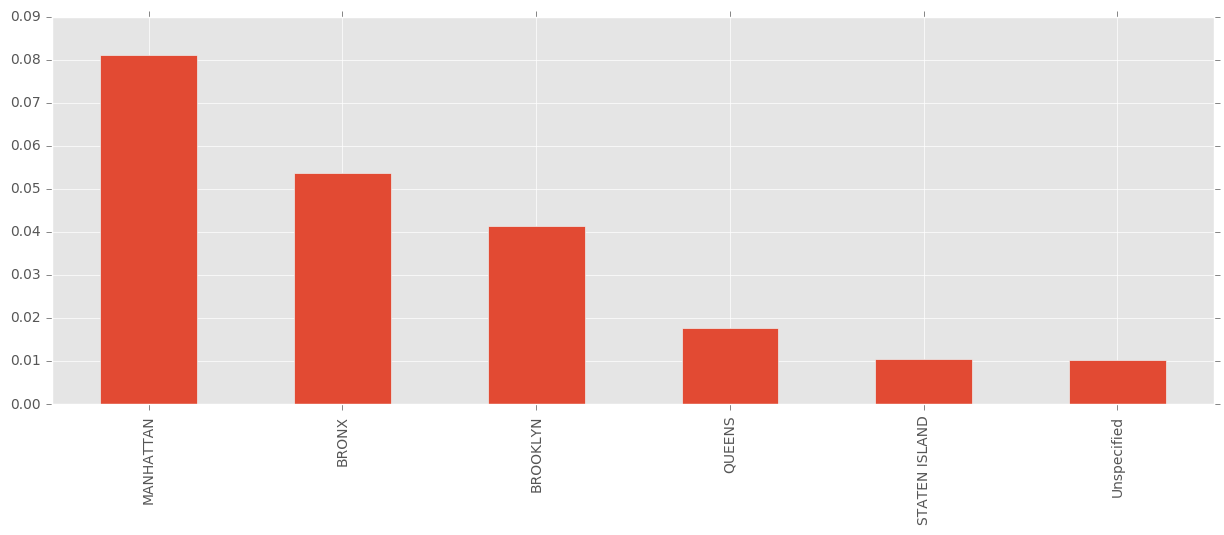

In [24]:
(noise_complaint_counts / complaint_counts).sort_values(ascending=False).plot(kind='bar');

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  